# Classification

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA

## Helper Functions

In [2]:
def evaluate(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print('=== Train Statistics ===')
    print('Accuracy:', accuracy_score(y_train, y_pred_train))
    print('Precision:', precision_score(y_train, y_pred_train))
    print('Recall:', recall_score(y_train, y_pred_train))
    print('F1:', f1_score(y_train, y_pred_train))

    print()

    print('=== Test Statistics ===')
    print('Accuracy:', accuracy_score(y_test, y_pred_test))
    print('Precision:', precision_score(y_test, y_pred_test))
    print('Recall:', recall_score(y_test, y_pred_test))
    print('F1:', f1_score(y_test, y_pred_test))


def class_report(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print('Train Statistics:')
    print(classification_report(y_train, y_pred_train))

    print()

    print('Test Statistics:')
    print(classification_report(y_test, y_pred_test))


def visualize_boundaries(model, X_train, y_train, X_test, y_test):
    # Perform PCA reduction on x_train and x_test
    reduction = PCA(n_components=2)
    X_train_reduced = reduction.fit_transform(X_train)
    X_test_reduced = reduction.transform(X_test)

    # Fit the dimensionally reduced data onto a copy of the classifier
    classifier = clone(model)
    classifier.fit(X_train_reduced, y_train)

    # Plot the regions
    X_set = np.concatenate([X_train_reduced, X_test_reduced], axis=0)
    y_set = np.concatenate([y_train, y_test], axis=0)

    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.1),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.1)
    )
    plt.contourf(X1, X2, 
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.5, cmap=ListedColormap(('red', 'blue'))
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'blue'))(i), label=j)
    plt.legend()
    plt.show()

## Load Data

In [3]:
dataset = load_breast_cancer(as_frame=True)
dataset.drop('id', axis=1, inplace=True)
dataset['class'].replace({2: 0, 4: 1}, inplace=True)
dataset.replace({'?': 0}, inplace=True)
dataset

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


## Train-Test Split

In [4]:
X = dataset.drop('class', axis=1)
y = dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (559, 9)
Shape of X_test (140, 9)
Shape of y_train: (559,)
Shape of y_test (140,)


## Logistic Regression

In [5]:
logistic_regression = LogisticRegression(penalty='l2', C=1e-3, solver='lbfgs')
logistic_regression.fit(X_train, y_train)

print(logistic_regression)

LogisticRegression(C=0.001)


In [6]:
evaluate(logistic_regression, X_train, y_train, X_test, y_test)

=== Train Statistics ===
Accuracy: 0.9516994633273703
Precision: 0.9550561797752809
Recall: 0.8994708994708994
F1: 0.9264305177111717

=== Test Statistics ===
Accuracy: 0.9428571428571428
Precision: 0.9782608695652174
Recall: 0.8653846153846154
F1: 0.9183673469387755


In [7]:
class_report(logistic_regression, X_train, y_train, X_test, y_test)

Train Statistics:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       370
           1       0.96      0.90      0.93       189

    accuracy                           0.95       559
   macro avg       0.95      0.94      0.95       559
weighted avg       0.95      0.95      0.95       559


Test Statistics:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        88
           1       0.98      0.87      0.92        52

    accuracy                           0.94       140
   macro avg       0.95      0.93      0.94       140
weighted avg       0.95      0.94      0.94       140



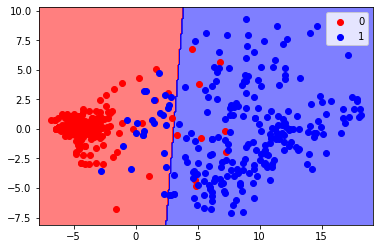

In [8]:
visualize_boundaries(logistic_regression, X_train, y_train, X_test, y_test)

## Support Vector Classification

In [9]:
svc = SVC(kernel='rbf', C=1e-1)
svc.fit(X_train, y_train)

print(svc)

SVC(C=0.1)


In [10]:
evaluate(svc, X_train, y_train, X_test, y_test)

=== Train Statistics ===
Accuracy: 0.964221824686941
Precision: 0.9246231155778895
Recall: 0.9735449735449735
F1: 0.9484536082474226

=== Test Statistics ===
Accuracy: 0.9785714285714285
Precision: 0.9803921568627451
Recall: 0.9615384615384616
F1: 0.970873786407767


In [11]:
class_report(svc, X_train, y_train, X_test, y_test)

Train Statistics:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       370
           1       0.92      0.97      0.95       189

    accuracy                           0.96       559
   macro avg       0.96      0.97      0.96       559
weighted avg       0.97      0.96      0.96       559


Test Statistics:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.98      0.96      0.97        52

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



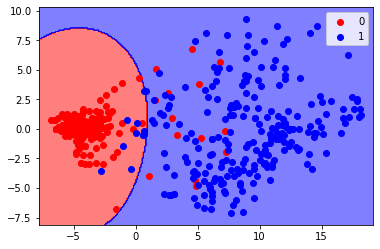

In [12]:
visualize_boundaries(svc, X_train, y_train, X_test, y_test)

## Decision Tree Classifier

In [13]:
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_features='auto')
decision_tree.fit(X_train, y_train)

print(decision_tree)

DecisionTreeClassifier(max_features='auto')


In [14]:
evaluate(decision_tree, X_train, y_train, X_test, y_test)

=== Train Statistics ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0

=== Test Statistics ===
Accuracy: 0.9571428571428572
Precision: 1.0
Recall: 0.8846153846153846
F1: 0.9387755102040816


In [15]:
class_report(decision_tree, X_train, y_train, X_test, y_test)

Train Statistics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       189

    accuracy                           1.00       559
   macro avg       1.00      1.00      1.00       559
weighted avg       1.00      1.00      1.00       559


Test Statistics:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        88
           1       1.00      0.88      0.94        52

    accuracy                           0.96       140
   macro avg       0.97      0.94      0.95       140
weighted avg       0.96      0.96      0.96       140



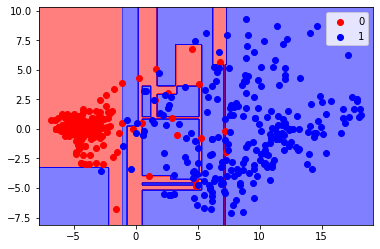

In [16]:
visualize_boundaries(decision_tree, X_train, y_train, X_test, y_test)

## Naive Bayes (Gaussian Likelihood)

In [17]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

print(naive_bayes)

GaussianNB()


In [18]:
evaluate(naive_bayes, X_train, y_train, X_test, y_test)

=== Train Statistics ===
Accuracy: 0.9588550983899821
Precision: 0.9068627450980392
Recall: 0.9788359788359788
F1: 0.9414758269720102

=== Test Statistics ===
Accuracy: 0.9642857142857143
Precision: 0.9433962264150944
Recall: 0.9615384615384616
F1: 0.9523809523809524


In [19]:
class_report(naive_bayes, X_train, y_train, X_test, y_test)

Train Statistics:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       370
           1       0.91      0.98      0.94       189

    accuracy                           0.96       559
   macro avg       0.95      0.96      0.95       559
weighted avg       0.96      0.96      0.96       559


Test Statistics:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        88
           1       0.94      0.96      0.95        52

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



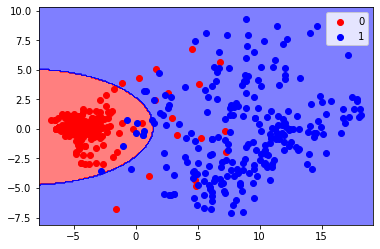

In [20]:
visualize_boundaries(naive_bayes, X_train, y_train, X_test, y_test)

## K-Nearest Neighbors Classifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print(knn)

KNeighborsClassifier(n_neighbors=3)


In [22]:
evaluate(knn, X_train, y_train, X_test, y_test)

=== Train Statistics ===
Accuracy: 0.9767441860465116
Precision: 0.9583333333333334
Recall: 0.9735449735449735
F1: 0.9658792650918635

=== Test Statistics ===
Accuracy: 0.9785714285714285
Precision: 0.9803921568627451
Recall: 0.9615384615384616
F1: 0.970873786407767


In [23]:
class_report(knn, X_train, y_train, X_test, y_test)

Train Statistics:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       370
           1       0.96      0.97      0.97       189

    accuracy                           0.98       559
   macro avg       0.97      0.98      0.97       559
weighted avg       0.98      0.98      0.98       559


Test Statistics:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.98      0.96      0.97        52

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



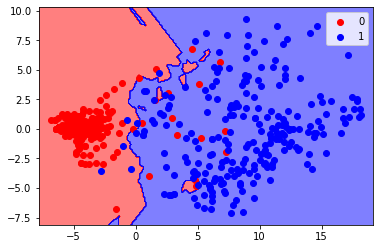

In [24]:
visualize_boundaries(knn, X_train, y_train, X_test, y_test)